# <center>Семинар №1<center>
### <left>Выполнила: Пилипенко Елизавета<left>
### <left>Группа: ИДБ-22-13<left>

Вам представлен датасет cars.csv с объявлениями о продаже в Германии на 2022 год. Необходимо осмотреть первично данные и выполнить их предобработку, также сделать соответствующие выводы по полученной информации

### Обзор данных

* `mileage` — Пройденное расстояние на автомобиле
* `make` — Марка автомобиля
* `model` — Модель автомобиля
* `fuel` — Тип топлива
* `gear` — Тип коробки передач
* `offerType` — Тип предложения, то есть «Новые», «Демонстрационные» машины и т.д.
* `price` — Цена продажи автомобиля в объявлении (в долларах)
* `hp` — Количество лошадиных сил
* `year` — Год производства автомобиля

Импортируйте необходимые библиотеки

In [3]:
import numpy as np
import pandas as pd

### Загрузка данных

1. Загрузите необходимый датасет в переменную

In [4]:
file = './data/cars.csv'
df = pd.read_csv(file)

2. Проведите первичный осмотр данных при помощи известных вам методов(дополнительно можно использовать метод hist() для оценки распределений). Сделайте соответствующие выводы на основе полученной информации

In [5]:
df.shape

(46405, 9)

In [6]:
df.sample(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
15641,70000,Suzuki,Splash,Gasoline,Manual,Used,5199.0,86.0,2011
10077,10,Opel,Corsa,Gasoline,Manual,Pre-registered,13588.0,75.0,2021
33914,110000,Opel,Zafira,Gasoline,Manual,Used,4790.0,150.0,2011
39265,67800,Fiat,500,Gasoline,Manual,Used,6500.0,69.0,2015
1159,35800,MINI,Cooper S Countryman,Gasoline,Automatic,Used,25930.0,192.0,2017
41809,39946,Citroen,C1,Gasoline,Manual,Used,7380.0,69.0,2017
8019,8980,Nissan,Qashqai,Gasoline,Automatic,Used,24698.0,159.0,2020
34947,114000,Volkswagen,Polo,Gasoline,Manual,Used,5790.0,86.0,2011
29131,30000,Mercedes-Benz,B 200,Diesel,Automatic,Used,27890.0,150.0,2019
855,117000,Nissan,Qashqai,Gasoline,Manual,Used,9850.0,117.0,2013


In [7]:
df['offerType'].value_counts()

offerType
Used              40122
Pre-registered     2780
Demonstration      2368
Employee's car     1122
New                  13
Name: count, dtype: int64

In [8]:
df['gear'].value_counts()

gear
Manual            30380
Automatic         15787
Semi-automatic       56
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46158 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      44872 non-null  float64
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.2+ MB


In [10]:
df.dropna().describe()

,mileage,price,hp,year
count,4.430400e+04,4.430400e+04,44304.000000,44304.000000
mean,7.130580e+04,1.656023e+04,132.946348,2016.008351
std,6.254724e+04,1.936608e+04,74.848607,3.156093
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.990000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.100000e+04,116.000000,2016.000000
75%,1.051940e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [11]:
df.isna().sum()

mileage         0
make            0
model         143
fuel          247
gear          182
offerType       0
price        1533
hp             29
year            0
dtype: int64

array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'hp'}>, <Axes: title={'center': 'year'}>]],
      dtype=object)

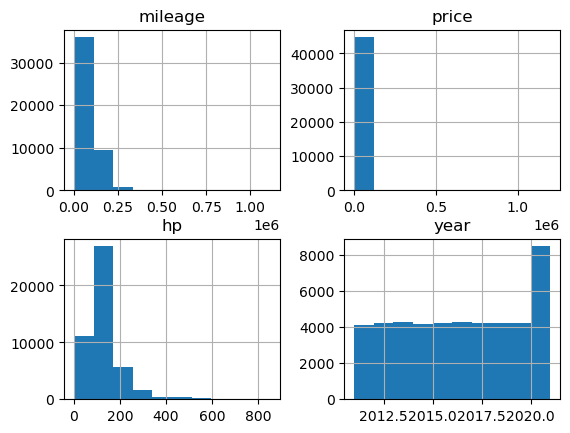

In [12]:
df.hist()

In [13]:
print(df['price'].max() - df['price'].min())

1198800.0


In [14]:
conclusion = '''
Путем первых действий, я пыталась найти закономерность, которая дала бы мне понять, почему именно эти
машины представленны в датасете, но последнее вычисление убило...

Было предположение, что датасет человека, который хотел купить недорогую б\у машину на механике, но
разница в ценнах машин нереальная, либо это вброс и гипотеза имеет место быть, либо слов нет
'''

print(conclusion)


Путем первых действий, я пыталась найти закономерность, которая дала бы мне понять, почему именно эти
машины представленны в датасете, но последнее вычисление убило...

Было предположение, что датасет человека, который хотел купить недорогую б\у машину на механике, но
разница в ценнах машин нереальная, либо это вброс и гипотеза имеет место быть, либо слов нет



In [15]:
mean_price = df['price'].mean()
print(mean_price)

16565.450525940454


In [16]:
filter_rule = df.price > mean_price
count_of_expensive_cars = df[filter_rule].shape
print(count_of_expensive_cars)

(13784, 9)


In [17]:
print('Persentage of expensive car: ' + str(count_of_expensive_cars[0] / df.shape[0]))

Persentage of expensive car: 0.297036957224437


In [18]:
conclusion = '''
Ну в целом, тут по-моему уже ясно что эти машины не случайно сюда попали, было бы пару штук..., 
фильтра на цену при поиске машин точно не стояло, ну да ладно, гипотеза мне нравилась

Тогда можно предположить, что это в целом случайно взятая выборка, но всё же меня смущает, то
что большинство машин на механике и использованных, возможно случайное совпадение
'''

print(conclusion)


Ну в целом, тут по-моему уже ясно что эти машины не случайно сюда попали, было бы пару штук..., 
фильтра на цену при поиске машин точно не стояло, ну да ладно, гипотеза мне нравилась

Тогда можно предположить, что это в целом случайно взятая выборка, но всё же меня смущает, то
что большинство машин на механике и использованных, возможно случайное совпадение



In [19]:
filter_rule = (df['gear'] == 'Manual') & (df['offerType'] == 'Used')
count_of_target_cars = df[filter_rule].shape

percantage_of_target_cars = count_of_target_cars[0] / df.shape[0]
print(percantage_of_target_cars)

0.5794418704880939


In [20]:
conclusion = '''
Ага ещё интереснее, посчитала, не поняла, в общем вывод:
Выборка скорее всего явялется случайной, конкретной закономерности не выявила
'''

print(conclusion)


Ага ещё интереснее, посчитала, не поняла, в общем вывод:
Выборка скорее всего явялется случайной, конкретной закономерности не выявила



In [21]:
df['make'].value_counts()

make
Volkswagen    6931
Opel          4814
Ford          4442
Skoda         2889
Renault       2830
              ... 
DAF              1
Isuzu            1
Trucks-Lkw       1
Tazzari          1
Zhidou           1
Name: count, Length: 77, dtype: int64

In [22]:
df['model'].value_counts()

model
Golf                         1492
Corsa                        1491
Fiesta                       1289
Astra                        1191
Focus                         985
                             ... 
S60 Cross Country               1
John Cooper Works Clubman       1
323                             1
Rodius                          1
NV250                           1
Name: count, Length: 841, dtype: int64

In [23]:
conclusion = '''
Сдаюсь, закономерности явно нет, либо я что-то упустила
'''

print(conclusion)


Сдаюсь, закономерности явно нет, либо я что-то упустила



3. Переименуйте столбец `offerType` под стандартное название

In [24]:
df.rename(columns={'offerType':'offer_type'}, inplace=True)

In [25]:
df.head()

,mileage,make,model,fuel,gear,offer_type,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011


### Работа с дубликатами данных

4. Необходимо вывести на экран количество дублированных строк в данных, если таковые имеются, а также избавиться от них. Не забудьте сбросить индекс в датафрейме при необходимости.

In [26]:
df.duplicated().sum()

2003

In [27]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

In [29]:
thought = '''
И тут я поняла, что то, что я делала до этого могло быть абсолютно бесполезным, так как я не почистила
датасет от дубликатов, ну ладно, сейчас проверим основные предположения
'''

filter_rule = (df['gear'] == 'Manual') & (df['offer_type'] == 'Used')
count_of_target_cars = df[filter_rule].shape

print(thought)

print('Persentage of expensive car: ' + str(count_of_expensive_cars[0] / df.shape[0]))

percantage_of_target_cars = count_of_target_cars[0] / df.shape[0]
print('Persentage of target car: ' + str(percantage_of_target_cars))

conclusion = '''
Не, всё по прежнему
'''

print(conclusion)


И тут я поняла, что то, что я делала до этого могло быть абсолютно бесполезным, так как я не почистила
датасет от дубликатов, ну ладно, сейчас проверим основные предположения

Persentage of expensive car: 0.31043646682581866
Persentage of target car: 0.5876537092923743

Не, всё по прежнему



### Работа с пропусками

5. Выведите на экран количество пропусков в каждом столбце, опишите их, почему они могут возникнуть и как их возможно исправить

In [40]:
df.shape

(44402, 9)

In [41]:
df.isna().sum()

mileage          0
make             0
model          137
fuel           247
gear           175
offer_type       0
price         1520
hp              24
year             0
dtype: int64

In [1]:
conclusion = '''
По большей части эти пропуски выглядят, как просто пропуски, без какой-либо закономерности.

Но стоит заметить, что model, fuel и gear не указываются почти с одинаковой частотой, 
относительно общего колличества элементов, так что вполне возможно, 
что эти атрибуты в сделке просто не учитывались, так как сделка происходила с рук

Чаще всего не указывали цену, странно, непонятно, но в целом возможно цена просто не расскрывалась 
для объекта, который получал эти данные. Хотя это и не выглядит разумно, так как мне кажется, 
что этот атрибут тут самый важный иначе зачем этот датасет. 

Но в целом, если условиться, что мы данные тянем из какого-нибудь авито, 
то цену могли просто не указать как и другие атрибуты, которые отсутсвуют
'''

print(conclusion)


По большей части эти пропуски выглядят, как просто пропуски, без какой-либо закономерности.

Но стоит заметить, что model, fuel и gear не указываются почти с одинаковой частотой, 
относительно общего колличества элементов, так что вполне возможно, 
что эти атрибуты в сделке просто не учитывались, так как сделка происходила с рук

Чаще всего не указывали цену, странно, непонятно, но в целом возможно цена просто не расскрывалась 
для объекта, который получал эти данные. Хотя это и не выглядит разумно, так как мне кажется, 
что этот атрибут тут самый важный иначе зачем этот датасет. 

Но в целом, если условиться, что мы данные тянем из какого-нибудь авито, 
то цену могли просто не указать как и другие атрибуты, которые отсутсвуют



6. Заполните пропуски в `model`,`fuel`,`gear`  
   <i>Напоминание: пропуски нужно заполнить <b>качественно</b> (т.е. не удалить и не заполнить значением 'Unknown' все NaN)</i>

In [30]:
conclusion = '''
Ход мысли такой: мы находим параметры, по которым мы можем найти недостающий атрибут
Если вообще не получается заполнить атрибут таким образом, то удаляем его..., но перед этим нужно
проверить на сколько это будет правильно

------------------------------------------------------------------
Комбинации:
make + model + year = fuel | gear
make + hp + year = fuel | gear | model

make + fuel + gear + year + hp = model

------------------------------------------------------------------
Нахождение комбинаций:
fuel = make + model + year (+)
rule = df['make'] == current & df['model'] == current & df['year'] == current

gear = make + model + year (+)
rule = df['make'] == current & df['model'] == current & df['year'] == current

model = make + fuel + gear + year + hp (+)
rule = df['make'] == current & df['fuel'] == current & df['gear'] == current & df['year'] == current & df['hp'] == current
------------------------------------------------------------------
model = make + hp + year (+-)
rule = df['make'] == current & df['hp'] == current & df['year'] == current

gear = make + hp + year (+-)
rule = df['make'] == current & df['hp'] == current & df['year'] == current

fuel = make + hp + year (+-)
rule = df['make'] == current & df['hp'] == current & df['year'] == current

------------------------------------------------------------------
По сути после этого большинство заполниться, но всё же если не заполниться, то просто чистим их,
иначе это будут данные далекие от реальности

------------------------------------------------------------------
Доп. проверка:
model | gear | fuel = make | hp | year
rule = df['make'] == current | df['hp'] == current | df['year'] == current


Код для решения получиться ситуативным, по сути его можно сделать модульным, но это займет
больше времени, да и в целом не требуется заданием, так что будет так
'''

print(conclusion)


Ход мысли такой: мы находим параметры, по которым мы можем найти недостающий атрибут
Если вообще не получается заполнить атрибут таким образом, то удаляем его..., но перед этим нужно
проверить на сколько это будет правильно

------------------------------------------------------------------
Комбинации:
make + model + year = fuel | gear
make + hp + year = fuel | gear | model

make + fuel + gear + year + hp = model

------------------------------------------------------------------
Нахождение комбинаций:
fuel = make + model + year (+)
rule = df['make'] == current & df['model'] == current & df['year'] == current

gear = make + model + year (+)
rule = df['make'] == current & df['model'] == current & df['year'] == current

model = make + fuel + gear + year + hp (+)
rule = df['make'] == current & df['fuel'] == current & df['gear'] == current & df['year'] == current & df['hp'] == current
------------------------------------------------------------------
model = make + hp + year (+-)
rule = d

In [45]:
df.head()

,mileage,make,model,fuel,gear,offer_type,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011


In [46]:
def fill_na_custom(df_main: pd.DataFrame) -> pd.DataFrame:
    # Нужно получить датафрейм с NaN внутри
    df_nas = df_main[(df_main['model'].isna()) | (df_main['fuel'].isna()) | (df_main['gear'].isna())]
    # nas = na`s
    df_nas = df_nas.reset_index(drop=False)
    # print(df_nas.head())
    # print(df_nas.iloc[0]['index'])
    # print(df_nas.loc[df_nas.iloc[0]['index']])
    # print(df_nas.shape)
    # print(df_nas.duplicated().sum())
    # print(df_nas.isna().sum())

    count_of_updates = 0
    for index in range(df_nas.shape[0]):
        car = df_nas.iloc[index] # Присваиваем переменной массив с данными о текущей машине
        # print(pd.isna(car.fuel))
        ratio_by_atribute = { # Коэфициент для того, чтобы понимать нужно менять занчение или нет
            'model': 0,
            'fuel': 0,
            'gear': 0,
        }

        main_df_index = car['index']
        # print(main_df_index)
        
        if pd.isna(car.model):
            ratio_by_atribute['model'] = -1 # Изменяем значени атрибута

            # Фильтр по которому ищется значение
            # print(df['make'] == car.make)
            rule = (df['make'] == car.make) & (df['fuel'] == car.fuel) & (df['gear'] == car.gear) & (df['year'] == car.year) & (df['hp'] == car.hp) & (pd.notna(df['model'])) 
            new_model = df[rule]
            
            if not new_model.empty:  # Если нашлось, то меняем обратно коэф и заменяем в исходном df
                new_model = df[rule].iloc[0].model
                ratio_by_atribute['model'] = 0

                # print("Changed 1")
                df_main.at[main_df_index, 'model'] = new_model
                count_of_updates += 1
        
        if pd.isna(car.fuel):
            ratio_by_atribute['fuel'] = -1
            # print((df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['fuel'])))
            rule = (df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['fuel']))
            new_fuel = df[rule]
            # print(new_fuel) # Тут я выявил, что даже, если все параметры совпдают не факт, что машина на бензине оно и логично....
            
            if not new_fuel.empty:
                new_fuel = df[rule].iloc[0].fuel
                ratio_by_atribute['fuel'] = 0

                # print("Changed 2")
                df_main.at[main_df_index, 'fuel'] = new_fuel
                count_of_updates += 1
        
        if pd.isna(car.gear):
            # print("HEREEEEEEEEEEEEEEEEEEE")
            ratio_by_atribute['gear'] = -1
            rule = (df['make'] == car.make) & (df['model'] == car.model) & (df['year'] == car.year) & (pd.notna(df['gear']))
            new_gear = df[rule]
            # print(new_gear)
            
            if not new_gear.empty:
                new_gear = df[rule].iloc[0].gear
                # print("GEAR CHANGE")
                # print(main_df_index)
                # print(df_main.iloc[main_df_index])
                # print(df_main.iloc[main_df_index].gear)
                
                ratio_by_atribute['gear'] = 0

                # print("Changed 3")
                df_main.at[main_df_index, 'gear'] = new_gear
                count_of_updates += 1

        # Фильтр по менее строгому правилу
        for atribute, ratio in ratio_by_atribute.items():
            if ratio == -1:
                rule = (df['make'] == car.make) & (df['hp'] == car.hp) & (df['year'] == car.year) & (pd.notna(df[atribute]))
                new_value = df[rule]
                if not new_value.empty:
                    new_value = df[rule].iloc[0][atribute]
                    # print("Changed 4", main_df_index, atribute, new_value)
                    df_main.at[main_df_index, atribute] = new_value
                    # print(df_main.loc[main_df_index, atribute])
                    ratio_by_atribute[atribute] = 0
                    count_of_updates += 1

        # Фильтр по вообще не строгому правилу
        for atribute, ratio in ratio_by_atribute.items():

            if ratio == -1:
                rule = ((df['make'] == car.make) | (df['hp'] == car.hp) | (df['year'] == car.year) & (pd.notna(df[atribute])))
                new_value = df[rule]
                if not new_value.empty:
                    new_value = df[rule].iloc[0][atribute]
                    # print("Changed 5")
                    df_main.at[main_df_index, atribute] = new_value
                    count_of_updates += 1
        # print(df_main.isna().sum())
                
    print("Count of updates: " + str(count_of_updates))
    return df_main
    

def main(df: pd.DataFrame) -> pd.DataFrame:
    result = fill_na_custom(df)
    
    return result


df_not_filled = df
print('--------------------------')
print(df_not_filled.isna().sum())
sum_of_na_cars = df_not_filled.isna().model.sum() + df_not_filled.isna().fuel.sum() + df_not_filled.isna().gear.sum()
print("Count of na found cars: " + str(sum_of_na_cars))
print('--------------------------')
#print(df_not_filled.head())

# Test
#rule_nas = df.dropna()
#rule_nas.head()
#df.isna().sum()
#df_nas = df[rule_nas]
#df_nas.head()

# Main
df_new = main(df_not_filled)
print('--------------------------')
print(df_new.isna().sum())
sum_of_not_changed = df_new.isna().model.sum() + df_new.isna().fuel.sum() + df_new.isna().gear.sum()
print("Count of not found cars: " + str(sum_of_not_changed))

--------------------------
mileage          0
make             0
model          137
fuel           247
gear           175
offer_type       0
price         1520
hp              24
year             0
dtype: int64
Count of na found cars: 559
--------------------------
Count of updates: 559
--------------------------
mileage          0
make             0
model            0
fuel             0
gear             0
offer_type       0
price         1520
hp              24
year             0
dtype: int64
Count of not found cars: 0


7. Удалите оставшиеся пропуски в столбцах `hp` и `price`.

In [48]:
df_new.dropna(subset=['hp', 'price'], inplace=True)

Проверьте, все ли пропуски точно удалились из датафрейма

In [50]:
df_new.isna().sum()

mileage       0
make          0
model         0
fuel          0
gear          0
offer_type    0
price         0
hp            0
year          0
dtype: int64

8. Оцените количество уникальных марок автомобилей (производителей) с помощью метода unique() и выведите их количество числом (пожалуйста, не считайте вручную)

In [52]:
df_new['make'].unique().size

76

9. Выведите топ 20 марок автомобилей (производителей) по количеству объявлений с помощью метода value_counts()

In [54]:
df_new['make'].value_counts().head(20)

make
Volkswagen       6510
Opel             4455
Ford             4114
Skoda            2665
Renault          2610
Audi             2479
BMW              2296
Mercedes-Benz    2217
SEAT             1773
Hyundai          1688
Fiat             1435
Peugeot          1136
Toyota           1106
Kia               937
smart             907
Citroen           888
Volvo             745
Nissan            705
Mazda             677
Dacia             630
Name: count, dtype: int64

### Группировка данных

10. Сгруппируйте данные по столбцу `make`, выведите для каждого производителя среднюю стоимость их автомобиля, а также среднее число лошадиных сил и отсортируйте по убыванию столбца `price`. Отобразите только топ 20 самых дорогих производителей. Напишите вывод, всё ли в порядке с полученными данными или Вас что-то смущает

In [61]:
group = df_new.groupby(by='make', as_index=False).agg(price_mean = ('price','mean'),
                                                 hp_mean = ('hp','mean'))
sorted = group.sort_values(by='price_mean', ascending=False).reset_index(drop=True)

print(sorted.head(20))

           make     price_mean     hp_mean
0       Maybach  450479.333333  543.000000
1       Ferrari  324028.181818  693.909091
2   Lamborghini  305698.777778  690.111111
3       McLaren  212474.000000  654.300000
4   Rolls-Royce  194900.000000  591.500000
5       Bentley  192123.307692  546.615385
6         Aston  163442.960000  536.200000
7      Corvette  110160.000000  687.000000
8       Porsche   89858.615044  412.340708
9        FISKER   69900.000000  408.000000
10     Maserati   69118.818182  376.363636
11       Alpina   66046.300000  443.000000
12     Polestar   64150.000000  408.000000
13        Tesla   62866.681818  490.500000
14       Morgan   61950.000000  177.000000
15       Alpine   53783.000000  244.800000
16         Land   51287.433121  246.070064
17          RAM   47945.000000  401.000000
18     Cadillac   45032.142857  348.285714
19        Dodge   44968.818182  395.636364


In [63]:
conclusion = '''
Не вижу никаких проблем
'''

df_new.head()

,mileage,make,model,fuel,gear,offer_type,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800.0,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877.0,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900.0,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950.0,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950.0,156.0,2011


11. Создайте новый столбец из `make` и `model` и выведите топ 10 самый дорогих и дешевых автомобилей с помощью средней стоимости

In [77]:
make_model = df_new['make'] + ' ' + df_new['model']
try:
    top_df = df_new.insert(0, 'make_model', make_model)
except ValueError:
    pass
grouped = df_new.groupby(by=['make_model'], as_index=False).agg(price=('price', 'mean'))
sorted = grouped.sort_values(by='price', ascending=False).reset_index(drop=True)
top_10 = sorted.head(10)
bottom_10 = sorted.tail(10)

print("Top 10:")
print(top_10)

print("------------------------------------------------")

print("Top -10:")
print(bottom_10.sort_values(by='price').reset_index(drop=True))

Top 10:
              make_model         price
0            Ferrari F12  1.199900e+06
1    Mercedes-Benz S 650  7.170780e+05
2        Maybach Pullman  6.084390e+05
3            Ferrari 812  4.399000e+05
4           Aston Martin  3.980000e+05
5  Lamborghini Aventador  3.714232e+05
6          McLaren 675LT  2.979000e+05
7     Ferrari F8 Tributo  2.944167e+05
8    Bentley Flying Spur  2.515600e+05
9           McLaren 720S  2.511450e+05
------------------------------------------------
Top -10:
                make_model        price
0              Lada Priora  1190.000000
1           Brilliance BS4  1500.000000
2               SEAT Panda  1650.000000
3          Others Landwind  1850.000000
4   Trailer-Anhänger Focus  2650.000000
5             Hyundai Getz  2800.000000
6  Trailer-Anhänger Fiesta  2950.000000
7           Volkswagen Fox  3011.181818
8              Peugeot 206  3363.000000
9               Fiat Linea  3400.000000


12. Сделайте общий вывод о проделанной работе

In [31]:
conclusion = '''
Было очень круто, реально понравилось разбираться, искать гипотезу, давно не писала алгоритмы, тоже вспомнила, поделала
Пришлось попыхтеть, но в целом результатом довольне, сем 10\\10

p.s. Спасибо за материалы к сему, они очень пригодились, ещё для себя небольщой конспект сделала, как памятку
'''

print(conclusion)


Было очень круто, реально понравилось разбираться, искать гипотезу, давно не писала алгоритмы, тоже вспомнила, поделала
Пришлось попыхтеть, но в целом результатом довольне, сем 10\10

p.s. Спасибо за материалы к сему, они очень пригодились, ещё для себя небольщой конспект сделала, как памятку

